In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
plt.style.use('ggplot')

In [5]:
df=pd.read_csv("/content/drive/MyDrive/data/Sentiment/Customer_feedback.csv",encoding='latin-1')

In [6]:
df.head()

,Number,responses_message,binary_score
0,0,"I took a loan of 100,000 rubles in 2015. The o...",negative
1,1,For a little more than a year I issued your ca...,positive
2,2,I would like to ask a question. By what right ...,negative
3,3,When applying for a consumer loan in the CC at...,negative
4,4,08/10/17 my husband received an SMS about the ...,negative


In [7]:
df.isnull().sum()

Number               0
responses_message    0
binary_score         8
dtype: int64

In [8]:
df.shape

(16659, 3)

In [9]:
df.dtypes

Number                int64
responses_message    object
binary_score         object
dtype: object

In [10]:
df.dropna(inplace=True)

In [11]:
df_review=df.copy()

In [12]:
df_review['binary_score'].value_counts()

negative    10906
positive     5745
Name: binary_score, dtype: int64

In [13]:
df_review['binary_score'].value_counts(normalize=True)*100

negative    65.497568
positive    34.502432
Name: binary_score, dtype: float64

In [14]:
df_review['binary_score']=df_review['binary_score'].map({'negative':0,'positive':1})

In [15]:
df_review.head()

,Number,responses_message,binary_score
0,0,"I took a loan of 100,000 rubles in 2015. The o...",0
1,1,For a little more than a year I issued your ca...,1
2,2,I would like to ask a question. By what right ...,0
3,3,When applying for a consumer loan in the CC at...,0
4,4,08/10/17 my husband received an SMS about the ...,0


<Axes: xlabel='binary_score', ylabel='count'>

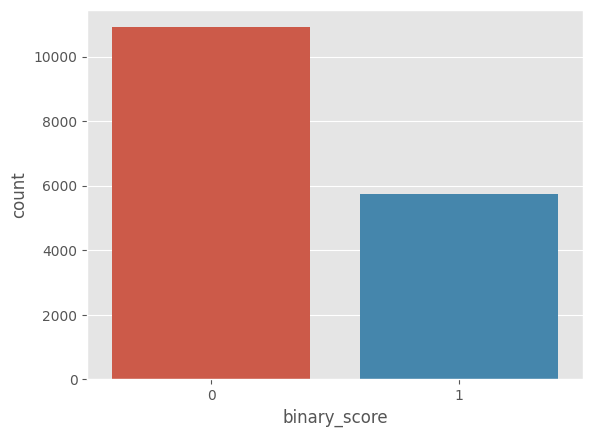

In [16]:
sns.countplot(data=df_review,x=df_review['binary_score'])

In [17]:
import nltk

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
import re
from nltk.tokenize import sent_tokenize,word_tokenize

In [20]:
stemmer=PorterStemmer()

In [21]:
lemmatizer=WordNetLemmatizer()

In [22]:
## Taking first respose mesaage
sample=df_review['responses_message'][0]

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
sentence_sample=sent_tokenize(sample)

In [26]:
sentence_sample

['I took a loan of 100,000 rubles in 2015.',
 'The office immediately began to breed for additional services, insurance, etc.',
 'Under the terms, they lied absolutely everything.',
 'When I was about to leave, the conditions softened.',
 'As a result, after a year of payments on schedule, I owed 92,000 rubles.',
 'Another year passed and I boldly assumed that the balance was not more than 70,000 on the loan.',
 'As I literally put it, I was surprised when, after another year, I owed less on the main debt of only 1,000 rubles less, totaling 91,000 rubles!',
 'That is, for 24 months of payments in the amount of at least 85,000 rubles, less than 9,000 rubles were written off from the main debt.',
 'I have not seen such predatory movements in any bank.',
 'In no case do not contact them.']

In [27]:
len(sentence_sample)

10

In [28]:
sub_words=re.sub('[^a-zA-Z]',' ',sample)

In [29]:
lower_sub=sub_words.lower()

In [30]:
## this function will take string data and convert into cleaned string
def clean_data_with_stopwords(df):
    text=re.sub('[^a-zA-Z]',' ',df)
    text=text.lower()
    text=text.split()
    stemmer_txt=[stemmer.stem(word) for word in text if word not in set(stopwords.words('english'))]
    final_word=' '.join(stemmer_txt)
    return final_word

In [31]:
pwd

'/content'

In [32]:
s1=clean_data_with_stopwords(sample)

In [33]:
s1

'took loan rubl offic immedi began breed addit servic insur etc term lie absolut everyth leav condit soften result year payment schedul owe rubl anoth year pass boldli assum balanc loan liter put surpris anoth year owe less main debt rubl less total rubl month payment amount least rubl less rubl written main debt seen predatori movement bank case contact'

In [34]:
## This functions will take df and column name so that it will return complete cospurs with celaned text
def clean_data_with_stopwords_df(df,column):
    corpus=[]
    for i in range(len(df)):
        text=re.sub('[^a-zA-Z]',' ',df[column][i])
        text=text.lower()
        text=text.split()
        stemmer_txt=[stemmer.stem(word) for word in text if word not in set(stopwords.words('english'))]
        final_word=' '.join(stemmer_txt)
        corpus.append(final_word)
    return corpus


In [35]:
## This functions will take df and column name so that it will return complete cospurs with celaned text
def clean_data_with_stopwords_df_lemmatize(df,column):
    corpus=[]
    for i in range(len(df)):
        text=re.sub('[^a-zA-Z]',' ',df[column][i])
        text=text.lower()
        text=text.split()
        lemmatized_text=[lemmatizer.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
        final_word=' '.join(lemmatized_text)
        corpus.append(final_word)
    return corpus


In [38]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [39]:
#pip install nltk

In [40]:
%%time
cleaned_corpus=clean_data_with_stopwords_df_lemmatize(df_review,'responses_message')

CPU times: user 6min 35s, sys: 48.1 s, total: 7min 24s
Wall time: 7min 29s


In [ ]:
## this is with stemming
cleaned_corpus[:5]

['took loan rubl offic immedi began breed addit servic insur etc term lie absolut everyth leav condit soften result year payment schedul owe rubl anoth year pass boldli assum balanc loan liter put surpris anoth year owe less main debt rubl less total rubl month payment amount least rubl less rubl written main debt seen predatori movement bank case contact',
 'littl year issu card interest free period month decid fulfil dream bought iron good price paid card everyth fine iron pleas point broke manufactur warranti workshop announc huge price repair sorrow edg came bank branch deposit money card well share troubl girl employe thank employe depart tell addit guarante privileg card visa payment system set iron free everyth work fine thank much bank staff attent attitud servic',
 'would like ask question right bank name third parti indic even appli loan situat delay relat absenc citi manag alway call announc payment date everyth paid began call husband demand pay loan even call direct co ban

In [41]:
cleaned_corpus[:5]

['took loan ruble office immediately began breed additional service insurance etc term lied absolutely everything leave condition softened result year payment schedule owed ruble another year passed boldly assumed balance loan literally put surprised another year owed le main debt ruble le totaling ruble month payment amount least ruble le ruble written main debt seen predatory movement bank case contact',
 'little year issued card interest free period month decided fulfill dream bought iron good price paid card everything fine iron pleased point broke manufacturer warranty workshop announced huge price repair sorrow edge came bank branch deposit money card well shared trouble girl employee thanks employee department telling additional guarantee privilege card visa payment system set iron free everything work fine thank much bank staff attentive attitude service',
 'would like ask question right bank name third party indicated even applying loan situation delay related absence city man

In [42]:
len(cleaned_corpus)

16651

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [44]:
cv=CountVectorizer(min_df=10)

In [45]:
# check for common words in corpus by collecting all words in a single list
all_words=[]
for sent in cleaned_corpus:
    w=sent.split()
    all_words.extend(w)

In [46]:
len(all_words)

1868340

In [47]:
len(set(all_words))

19010

In [48]:
all_words[:10]

['took',
 'loan',
 'ruble',
 'office',
 'immediately',
 'began',
 'breed',
 'additional',
 'service',
 'insurance']

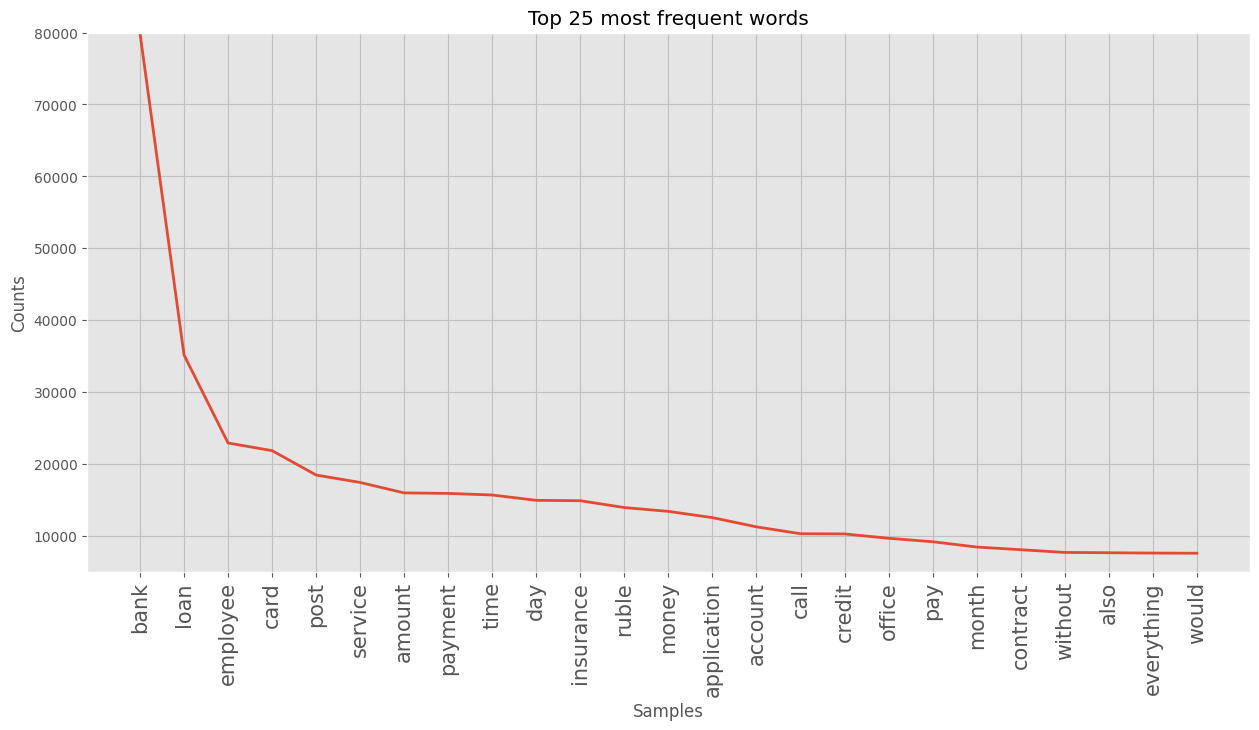

In [49]:
## creating a plot for most frequent words
freq_d=nltk.FreqDist(all_words)
plt.figure(figsize=(15,7))
plt.title("Top 25 most frequent words")
plt.xticks(fontsize=15)
plt.ylim(5000,80000)
freq_d.plot(25,cumulative=False)
plt.show()

In [50]:
cv

CountVectorizer(min_df=10)

In [51]:
cv_features=cv.fit_transform(cleaned_corpus).toarray()

In [52]:
cv_features.shape

(16651, 5459)

In [53]:
cv_zero=CountVectorizer()

In [54]:
cv_zero_features=cv_zero.fit_transform(cleaned_corpus).toarray()

In [55]:
cv_zero_features.shape

(16651, 18987)

In [56]:
## converting text into vectors
cv_df=pd.DataFrame(cv_features)

In [57]:
cv_df

,0,1,2,3,4,5,6,7,8,9,...,5449,5450,5451,5452,5453,5454,5455,5456,5457,5458
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16647,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
np.count_nonzero(cv_df)

1303573

In [59]:
100*np.count_nonzero(cv_df)/cv_df.size

1.4341082742709452

In [60]:
cv_df.size

90897809

In [61]:
# Model Building

## Model Building

In [62]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [63]:
mnb=MultinomialNB()
gnb=GaussianNB()
rf=RandomForestClassifier()
lgc=LogisticRegression()

In [64]:
X=cv_features
y=df_review['binary_score']

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=34,stratify=y)

In [66]:
X_train.shape

(12488, 5459)

In [67]:
y_train.shape

(12488,)

In [68]:
def score_func(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    return accuracy_score(y_test,y_pred)

In [69]:
%%time
score_mnb=score_func(mnb,X_train,y_train,X_test,y_test)
score_mnb

CPU times: user 901 ms, sys: 49.8 ms, total: 951 ms
Wall time: 924 ms


0.629353831371607

In [70]:
%%time
score_gnb=score_func(gnb,X_train,y_train,X_test,y_test)
score_gnb

CPU times: user 1.04 s, sys: 439 ms, total: 1.48 s
Wall time: 1.48 s


0.48090319481143406

In [71]:
%%time
score_rf=score_func(rf,X_train,y_train,X_test,y_test)
score_rf

CPU times: user 23.7 s, sys: 117 ms, total: 23.8 s
Wall time: 23.9 s


0.6617823684842662

In [72]:
%%time
score_lrc=score_func(lgc,X_train,y_train,X_test,y_test)
score_lrc

CPU times: user 15.1 s, sys: 1.57 s, total: 16.7 s
Wall time: 11 s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6096564977179918

In [73]:
lgc.score(X_train,y_train)

0.8005285073670724

In [74]:
rf.score(X_train,y_train)

1.0

In [75]:
lr1=LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l2', C=0.4)

In [76]:
%%time
score_lr1=score_func(lr1,X_train,y_train,X_test,y_test)
score_lr1

CPU times: user 1.37 s, sys: 138 ms, total: 1.5 s
Wall time: 1.48 s


0.5673792937785251

## lets check with countvectorizer with min_df=0

In [77]:
X=cv_zero_features
y=df_review['binary_score']

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=34,stratify=y)

In [79]:
X_train.shape

(13320, 18987)

In [80]:
%%time
score_mnb=score_func(mnb,X_train,y_train,X_test,y_test)
score_mnb

CPU times: user 3.76 s, sys: 97.2 ms, total: 3.86 s
Wall time: 7.38 s


0.6331432002401681

In [81]:
%%time
score_gnb=score_func(gnb,X_train,y_train,X_test,y_test)
score_gnb

CPU times: user 3.73 s, sys: 2.65 s, total: 6.38 s
Wall time: 6.57 s


0.4596217352146503

In [82]:
%%time
score_rf=score_func(rf,X_train,y_train,X_test,y_test)
score_rf

CPU times: user 1min 8s, sys: 301 ms, total: 1min 8s
Wall time: 1min 8s


0.6610627439207445

In [83]:
%%time
score_lgc=score_func(lgc,X_train,y_train,X_test,y_test)
score_lgc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: user 58.6 s, sys: 11.6 s, total: 1min 10s
Wall time: 44.2 s


0.601921344941459

In [84]:
## lets use countvectorizer for min_df=10 and max_features=1000

In [85]:
nltk_stopwords=stopwords.words('english')

In [86]:
len(stopwords.words('english'))

179

In [87]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sk_stopwords=ENGLISH_STOP_WORDS

In [88]:
len(sk_stopwords)

318

In [89]:
combined_stopwords=sk_stopwords.union(nltk_stopwords)

In [90]:
cv_1000=CountVectorizer(min_df=10,max_features=1000)

In [91]:
cv_1000_features=cv_1000.fit_transform(cleaned_corpus).toarray()

In [92]:
cv_1000_features.shape

(16651, 1000)

In [93]:
X=cv_1000_features

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=34)

In [95]:
%%time
score_mnb=score_func(mnb,X_train,y_train,X_test,y_test)
score_mnb

CPU times: user 202 ms, sys: 9.03 ms, total: 211 ms
Wall time: 206 ms


0.6449675714628873

In [96]:
%%time
score_gnb=score_func(gnb,X_train,y_train,X_test,y_test)
score_gnb

CPU times: user 186 ms, sys: 87.8 ms, total: 274 ms
Wall time: 271 ms


0.5313475858755705

In [97]:
%%time
score_rf=score_func(rf,X_train,y_train,X_test,y_test)
score_rf

CPU times: user 8.79 s, sys: 31.7 ms, total: 8.83 s
Wall time: 8.88 s


0.6610617343262071

## Check with TF IDF Vecotizer

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [99]:
tfidf=TfidfVectorizer(min_df=5, max_features=1000)

In [100]:
tfidf_feaures=tfidf.fit_transform(cleaned_corpus).toarray()

In [101]:
tfidf_feaures.shape

(16651, 1000)

In [102]:
X=tfidf_feaures

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=34)

In [104]:
%%time
score_mnb=score_func(mnb,X_train,y_train,X_test,y_test)
score_mnb

CPU times: user 72.5 ms, sys: 4.95 ms, total: 77.5 ms
Wall time: 49.9 ms


0.6716310353110737

In [105]:
%%time
score_rf=score_func(rf,X_train,y_train,X_test,y_test)
score_rf

CPU times: user 15 s, sys: 36.2 ms, total: 15 s
Wall time: 15.1 s


0.6663463848186404

In [106]:
%%time
score_gnb=score_func(gnb,X_train,y_train,X_test,y_test)
score_gnb

CPU times: user 160 ms, sys: 84.9 ms, total: 245 ms
Wall time: 246 ms


0.6334374249339418

In [107]:
%%time
score_lgc=score_func(lgc,X_train,y_train,X_test,y_test)
score_lgc

CPU times: user 2.6 s, sys: 178 ms, total: 2.78 s
Wall time: 1.46 s


0.6622627912563055

In [108]:
lgc.score(X_train,y_train)

0.6951473414477899

In [109]:
%%time
score_lr1=score_func(lr1,X_train,y_train,X_test,y_test)
score_lr1

CPU times: user 193 ms, sys: 8.86 ms, total: 201 ms
Wall time: 198 ms


0.6173432620706222

## Check with n grams

In [171]:
CV_ngram3 = CountVectorizer(ngram_range=(5, 6), min_df=10,max_features=1000)

In [172]:
CV_ngram3_features=CV_ngram3.fit_transform(cleaned_corpus).toarray()

In [173]:
CV_ngram3_features.shape

(16651, 1000)

In [174]:
X=CV_ngram3_features

In [175]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=34)

In [176]:
%%time
score_mnb=score_func(mnb,X_train,y_train,X_test,y_test)
score_mnb

CPU times: user 102 ms, sys: 4.98 ms, total: 107 ms
Wall time: 98.7 ms


0.6569781407638722

In [177]:
%%time
score_gnb=score_func(gnb,X_train,y_train,X_test,y_test)
score_gnb

CPU times: user 199 ms, sys: 71.9 ms, total: 271 ms
Wall time: 270 ms


0.36416046120586115

In [178]:
%%time
score_rf=score_func(rf,X_train,y_train,X_test,y_test)
score_rf

CPU times: user 13.1 s, sys: 32.9 ms, total: 13.1 s
Wall time: 13.1 s


0.6545760269036752

## Check using Word2Vec

In [124]:
from gensim.models import Word2Vec

In [125]:
make_cbow_list=[ls1.split() for ls1 in cleaned_corpus]

In [126]:
cbow_model=Word2Vec(make_cbow_list,vector_size=100,window=5,min_count=5)

In [127]:
cbow_model.wv.index_to_key[:20]

['bank',
 'loan',
 'employee',
 'card',
 'post',
 'service',
 'amount',
 'payment',
 'time',
 'day',
 'insurance',
 'ruble',
 'money',
 'application',
 'account',
 'call',
 'credit',
 'office',
 'pay',
 'month']

In [128]:
len(cbow_model.wv.index_to_key)

7687

In [129]:
cbow_model.wv.get_vector('loan')

array([ 0.42228442, -0.6345212 , -0.3444068 ,  0.8161482 ,  2.0475247 ,
       -1.0700973 , -0.865225  ,  0.31002855, -0.8767119 , -0.58637226,
        0.618032  , -2.6603646 ,  0.398283  ,  1.558695  ,  0.6100309 ,
        1.6848042 , -0.15566789,  2.5152812 , -0.23329423, -0.814829  ,
       -0.01044915, -1.0097812 ,  2.2563794 , -2.1262786 ,  1.9337825 ,
        2.2892795 , -0.32681173,  1.234957  ,  0.6490935 , -0.13631539,
        0.37660772, -1.4571925 , -1.3613527 , -0.6491524 ,  0.1758028 ,
       -2.0611546 , -0.17100738, -0.03839107,  1.8080064 ,  0.5732008 ,
        0.10706946, -2.0835156 , -0.62702584, -0.5156015 , -0.19157876,
        2.0816672 ,  1.3098786 ,  0.78014344,  1.6763841 ,  0.78969413,
        0.5382841 , -2.5309792 , -2.0671208 , -0.32535955, -1.2959394 ,
        0.65722644, -0.41713125,  0.83690083, -0.7860731 , -0.8305331 ,
        0.98192203,  2.3868418 ,  0.09445327, -0.6524211 , -1.118506  ,
        0.04572982,  0.44597456, -0.6235666 ,  2.5301576 ,  0.87

In [130]:
## check for 1st data
cbow_1=[word for word in cleaned_corpus[0].split() if word in cbow_model.wv.index_to_key]

In [131]:
len(cbow_1)

59

In [132]:
len(cleaned_corpus[0])

405

In [133]:
## vector respresentation of word in 1st feedback
wv1=[]
for word in cbow_1:
    wv1.append(cbow_model.wv.get_vector(word))

In [134]:
wv1[:2]

[array([ 0.7370736 , -1.222403  , -0.21143688, -1.1204801 ,  2.8434546 ,
        -1.6418188 , -1.2599328 , -2.043153  , -2.6563485 , -0.29710168,
        -1.414472  ,  3.473744  , -1.1048782 ,  1.5695877 ,  0.75568384,
         0.02951171, -0.80201364, -0.074978  , -1.717496  , -0.62156653,
         0.35674384, -1.4256463 ,  1.063389  , -1.0102901 ,  0.9621835 ,
        -0.18828522, -0.6272441 ,  0.07943172, -0.00808346, -2.024517  ,
        -1.9094076 , -0.7091391 ,  1.0929775 ,  0.11582025,  1.2399374 ,
         0.15016687, -2.2714405 ,  2.2038105 , -0.39978752, -0.7339253 ,
        -0.12612608,  0.31847018,  2.526378  ,  0.8444075 ,  0.6809587 ,
        -2.0167747 , -0.14530177, -0.76645976,  0.6923735 ,  0.7246957 ,
         0.05222278,  0.7135924 ,  0.96682084,  1.440281  , -0.86821264,
        -1.6704762 , -0.08496457,  1.0823854 , -0.4457585 , -1.5738707 ,
         2.7886236 ,  1.4114382 , -0.2751751 ,  0.80847174, -0.2303822 ,
         0.9194476 ,  1.7072437 , -0.15593792, -0.5

In [135]:
wv1=np.array(wv1)

In [136]:
wv1

array([[ 0.7370736 , -1.222403  , -0.21143688, ..., -1.0108278 ,
        -0.45672616, -0.6214339 ],
       [ 0.42228442, -0.6345212 , -0.3444068 , ..., -0.4022856 ,
        -0.8678423 , -2.1346457 ],
       [ 3.0804062 , -1.9270092 ,  0.05550264, ..., -2.2725933 ,
        -0.7970051 , -0.07731313],
       ...,
       [-0.8835353 , -0.18901516, -0.03080984, ..., -2.069568  ,
         0.8526002 ,  0.549609  ],
       [-0.14039476, -0.70765275,  0.7112259 , ..., -0.7434349 ,
         0.7676774 ,  0.00972113],
       [ 0.5348183 ,  0.8357909 , -1.465729  , ..., -0.5608622 ,
         3.8474944 , -1.3895802 ]], dtype=float32)

In [138]:
# This will give mean of vectors of words  in 1st feedback this has (ingle array of 100 dimension for 1st sentence or feedback)
wv1.mean(axis=0)

array([ 0.6539613 , -0.6117571 , -0.09667073, -0.01497665,  0.3790368 ,
       -0.30512962, -0.6338285 , -0.08284456, -0.62908274, -0.28831476,
        0.28806168,  0.22041382,  0.23912813,  0.26311648,  0.60444474,
        0.2833961 , -0.429164  ,  0.5833791 , -0.0066658 , -0.2648292 ,
       -0.19096315, -0.54704887, -0.05435373, -0.76936966,  0.04689727,
        0.7011302 , -0.26941103, -0.2099316 ,  0.37135783, -0.43042323,
       -0.5926502 ,  0.21629664, -0.5660523 ,  0.60537314, -0.23192853,
       -0.51813823, -0.9364934 , -0.17577364,  0.20699689, -0.11728603,
       -0.18198425, -0.29390305,  0.2752298 ,  0.31347308,  0.17726377,
        0.5637229 ,  0.09792245, -0.06090636,  0.2505936 , -0.02596929,
        0.00466307, -0.46325725, -0.42257974, -0.17425503, -0.30419236,
        0.11483724, -0.69277906,  0.24892771, -0.6084726 , -0.55364287,
        0.13458975,  0.543631  , -0.14285515,  0.32211494, -0.95092314,
       -0.12477133, -0.3795406 , -0.23875402,  0.26769394,  0.28

In [139]:
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""

    # doc1 contains those words of the document which are included in the vocab
    doc1 = [word for word in doc.split() if word in cbow_model.wv.index_to_key]

    wv1 = []  # this will contain the WE of all the vocab words from the doc
    for word in doc1:
        wv1.append(cbow_model.wv.get_vector(word))
    wv1_ = np.array(wv1)
    wv1_mean = wv1_.mean(axis=0)
    return wv1_mean


In [140]:
cbow_corpus=[]
for sent in cleaned_corpus:
    sent_wv=document_vector(sent)
    cbow_corpus.append(sent_wv)

In [141]:
cbow_corpus_array=np.array(cbow_corpus)

In [142]:
cbow_corpus_array.shape

(16651, 100)

In [144]:
cbow_corpus_array[0].shape

(100,)

In [145]:
cbow_corpus_array[0]

array([ 0.6539613 , -0.6117571 , -0.09667073, -0.01497665,  0.3790368 ,
       -0.30512962, -0.6338285 , -0.08284456, -0.62908274, -0.28831476,
        0.28806168,  0.22041382,  0.23912813,  0.26311648,  0.60444474,
        0.2833961 , -0.429164  ,  0.5833791 , -0.0066658 , -0.2648292 ,
       -0.19096315, -0.54704887, -0.05435373, -0.76936966,  0.04689727,
        0.7011302 , -0.26941103, -0.2099316 ,  0.37135783, -0.43042323,
       -0.5926502 ,  0.21629664, -0.5660523 ,  0.60537314, -0.23192853,
       -0.51813823, -0.9364934 , -0.17577364,  0.20699689, -0.11728603,
       -0.18198425, -0.29390305,  0.2752298 ,  0.31347308,  0.17726377,
        0.5637229 ,  0.09792245, -0.06090636,  0.2505936 , -0.02596929,
        0.00466307, -0.46325725, -0.42257974, -0.17425503, -0.30419236,
        0.11483724, -0.69277906,  0.24892771, -0.6084726 , -0.55364287,
        0.13458975,  0.543631  , -0.14285515,  0.32211494, -0.95092314,
       -0.12477133, -0.3795406 , -0.23875402,  0.26769394,  0.28

In [146]:
tweets_vec = np.ones((len(cbow_corpus_array), 100))*np.nan

In [148]:
tweets_vec.shape

(16651, 100)

In [150]:
for i in range(tweets_vec.shape[0]):
    tweets_vec[i,:] = cbow_corpus_array[i]

In [151]:
tweets_vec

array([[ 0.6539613 , -0.6117571 , -0.09667073, ..., -0.57226825,
         0.02551039, -0.39528626],
       [-0.01915599, -0.28321308, -0.04483091, ...,  0.10211785,
        -0.11881617, -0.25778282],
       [ 0.31818613, -0.12104949, -0.34439254, ..., -0.1810715 ,
         0.59306657, -0.5024752 ],
       ...,
       [ 0.54097742, -0.56539643, -0.19288988, ..., -0.68054992,
        -0.09351246, -0.43680781],
       [-0.02224956, -0.05737776,  0.05387461, ...,  0.1103371 ,
         0.38225633, -0.3815482 ],
       [ 0.52779305, -0.28532574, -0.38083017, ..., -0.43229172,
         0.42896533, -0.29579639]])

In [152]:
cbow_corpus_array

array([[ 0.6539613 , -0.6117571 , -0.09667073, ..., -0.57226825,
         0.02551039, -0.39528626],
       [-0.01915599, -0.28321308, -0.04483091, ...,  0.10211785,
        -0.11881617, -0.25778282],
       [ 0.31818613, -0.12104949, -0.34439254, ..., -0.1810715 ,
         0.5930666 , -0.5024752 ],
       ...,
       [ 0.5409774 , -0.5653964 , -0.19288988, ..., -0.6805499 ,
        -0.09351246, -0.4368078 ],
       [-0.02224956, -0.05737776,  0.05387461, ...,  0.1103371 ,
         0.38225633, -0.3815482 ],
       [ 0.52779305, -0.28532574, -0.38083017, ..., -0.43229172,
         0.42896533, -0.2957964 ]], dtype=float32)

In [153]:
X=pd.DataFrame(cbow_corpus_array)

In [155]:
X.shape

(16651, 100)

In [158]:
X.isnull().sum().sum()

0

In [159]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42,stratify=y)

In [160]:
%%time
score_gnb=score_func(gnb,X_train,y_train,X_test,y_test)
score_gnb

CPU times: user 20.5 ms, sys: 46 µs, total: 20.6 ms
Wall time: 20.3 ms


0.6394476133293305

In [161]:
%%time
score_rf=score_func(rf,X_train,y_train,X_test,y_test)
score_rf

CPU times: user 17.3 s, sys: 13.3 ms, total: 17.3 s
Wall time: 17.3 s


0.6613629540678475

In [162]:
%%time
score_gnb=score_func(gnb,X_train,y_train,X_test,y_test)
score_gnb

CPU times: user 26.6 ms, sys: 255 µs, total: 26.8 ms
Wall time: 55.2 ms


0.6394476133293305

In [163]:
%%time
score_lgc=score_func(lgc,X_train,y_train,X_test,y_test)
score_lgc

CPU times: user 372 ms, sys: 142 ms, total: 514 ms
Wall time: 299 ms


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6643650555388773

## Lets Try with some other classifer

In [164]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [165]:
adb=AdaBoostClassifier()
gdb=GradientBoostingClassifier()
svc=SVC()
knn=KNeighborsClassifier()
xgb=XGBClassifier()

In [166]:
%%time
score_adb=score_func(adb,X_train,y_train,X_test,y_test)
score_adb

CPU times: user 10.4 s, sys: 14.9 ms, total: 10.5 s
Wall time: 10.6 s


0.6622635845091565

In [167]:
%%time
score_gdb=score_func(gdb,X_train,y_train,X_test,y_test)
score_gdb

CPU times: user 51.8 s, sys: 47.8 ms, total: 51.9 s
Wall time: 52.1 s


0.6616631642149504

In [168]:
%%time
score_xgb=score_func(xgb,X_train,y_train,X_test,y_test)
score_xgb

CPU times: user 9.24 s, sys: 52.2 ms, total: 9.29 s
Wall time: 7.76 s


0.6373461422996097

In [169]:
%%time
score_svc=score_func(svc,X_train,y_train,X_test,y_test)
score_svc

CPU times: user 22.8 s, sys: 208 ms, total: 23 s
Wall time: 25.3 s


0.6625637946562594

In [170]:
%%time
score_knn=score_func(knn,X_train,y_train,X_test,y_test)
score_knn

CPU times: user 954 ms, sys: 14.6 ms, total: 968 ms
Wall time: 1.3 s


0.6181326928850195